Por Gabriel Garcia Caysahuana \
Con datos de https://finance.yahoo.com/  

Acciones de empresas en análisis: \
MSFT: Microsoft Corporation\
TSLA: Tesla, Inc.\
NVDA: NVIDIA Corporation\
AAPL: Apple Inc.\
GOOG: Alphabet Inc. (compañía matriz de Google)\
AMZN: Amazon.com, Inc.\
AMD: Advanced Micro Devices, Inc.\
SBUX: Starbucks Corporation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Símbolos de los activos del portafolio
tickers = ["MSFT", "TSLA",'NVDA', 'AAPL','GOOG','AMZN', 'AMD','SBUX']

In [3]:
# Obtener datos históricos de los activos de Yahoo Finance
data = yf.download(tickers, start="2017-01-23", end="2023-06-12")["Adj Close"].dropna()

# Calcular rendimientos diarios
for ticker in tickers:
    data[f'R{ticker}'] = np.log(data[ticker] / data[ticker].shift(1))
data=data.dropna()

[*********************100%***********************]  8 of 8 completed


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,1606.0,91.756148,49.871342,27.986994,43.542881,75.599541,142.205879,180.960007
AMD,1606.0,55.789365,38.112193,9.530000,19.007500,51.570000,86.002497,161.910004
AMZN,1606.0,108.169545,40.370355,40.382000,82.140503,96.678249,152.550621,186.570496
GOOG,1606.0,81.373710,31.742421,39.784752,55.071374,69.688751,106.113752,150.709000
MSFT,1606.0,177.262661,84.130290,57.916855,99.672899,168.807106,251.350822,338.335938
NVDA,1606.0,113.996946,81.677902,23.563198,46.746201,70.394836,165.440769,401.068481
SBUX,1606.0,77.139807,21.406450,43.869919,53.426018,77.560085,97.289585,120.919861
TSLA,1606.0,118.660352,112.761929,11.931333,20.904333,49.901001,220.184170,409.970001
RMSFT,1606.0,0.001079,0.018314,-0.159454,-0.006989,0.001131,0.010401,0.132929
RTSLA,1606.0,0.001675,0.038803,-0.236518,-0.017445,0.001607,0.020280,0.181445


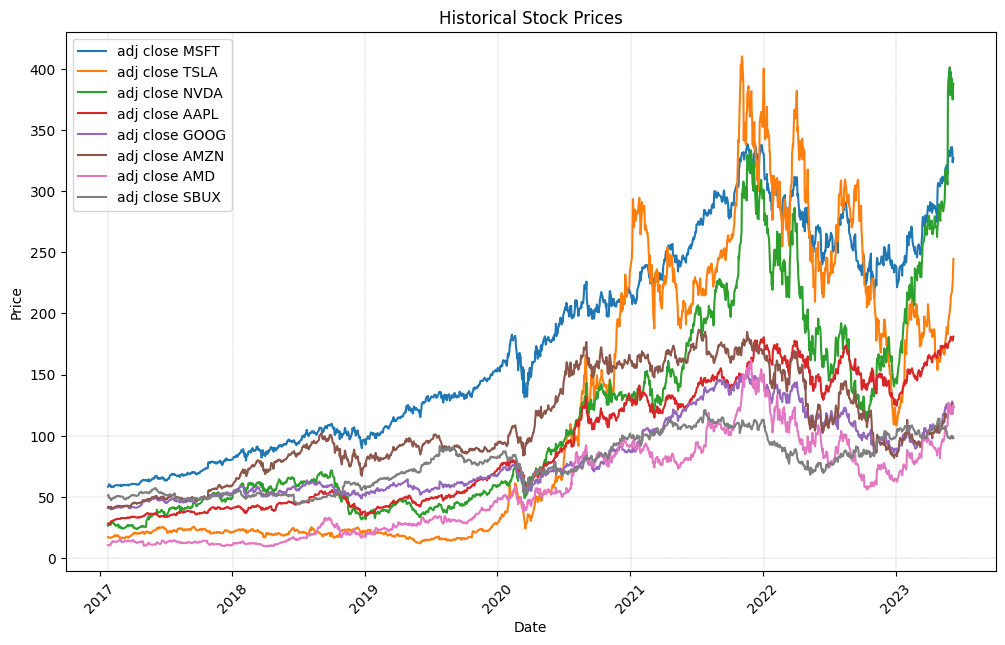

In [5]:
# Crear una figura con dos subgráficos
fig, ax = plt.subplots(figsize=(12, 7))
# Graficar los precios históricos de JNJ, MSFT, NVDA y TSLA en un solo gráfico
for ticker in tickers:
    sns.lineplot(data=data, x='Date', y=ticker, label=f'adj close {ticker}')
    
# Configurar las etiquetas del eje x y el título del gráfico
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Stock Prices')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Agregar líneas verticales para cada año
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
for year in years:
    # Filtrar los datos por el año actual
    year_data = data[data.index.year == year]
    if len(year_data) > 0:
        # Dibujar una línea vertical en el primer día del año
        plt.axvline(year_data.index[0], linestyle='--', color='gray', linewidth=0.2)
        
# Agregar líneas horizontales en incrementos de 50 para los precios
price_levels = range(0, int(data[ticker].max().max()), 50)
for level in price_levels:
    plt.axhline(level, linestyle='--', color='gray', linewidth=0.2)
    
# Mostrar la leyenda
plt.legend(loc='upper left')

# Guardar el gráfico
# plt.savefig('Historical Stock Prices.png')

# Mostrar el gráfico
plt.show()

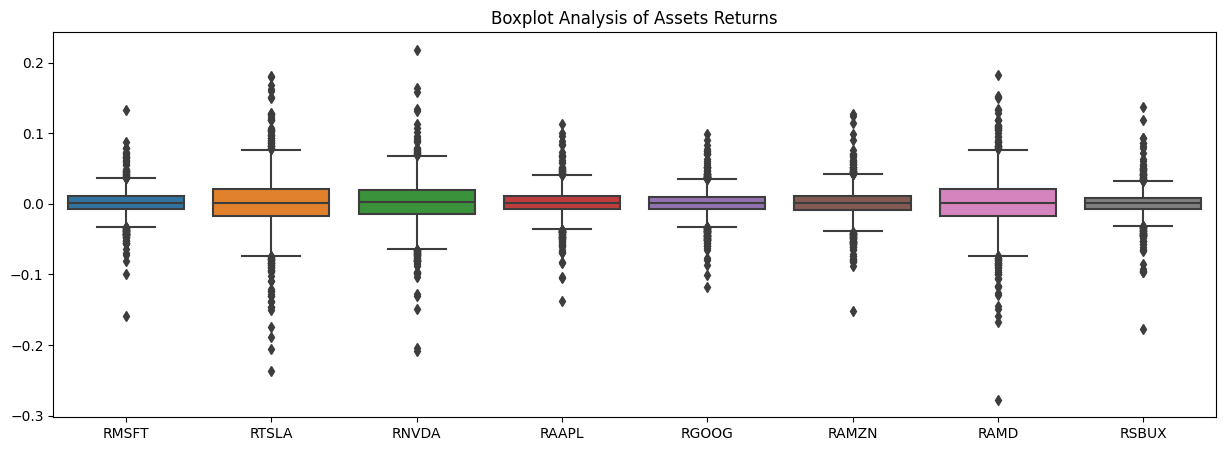

In [6]:
# Box plot
retornos = {}
for ticker in tickers:
    retornos[f'R{ticker}'] = data[f'R{ticker}'].values

#Creamos una figura con tamaño específico
plt.figure(figsize=(15, 5))

sns.boxplot(data=pd.DataFrame(retornos))
plt.title('Boxplot Analysis of Assets Returns')

# Mostramos el gráfico
plt.show()


In [7]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [8]:
precios={}
for ticker in tickers:
    precios[ticker] = data[f'{ticker}'].values
# precios=precios.dropna()
mu = expected_returns.mean_historical_return(precios, frequency=252, log_returns=True) #rentabilidades esperadas
Sigma = risk_models.sample_cov(precios) #matriz de covarianza y covarianzas

ef = EfficientFrontier(mu, Sigma) #Frontera de eficiencia
# precios.head()

C:\Users\PC SITOS\Python310\lib\site-packages\pypfopt\expected_returns.py:136: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)
C:\Users\PC SITOS\Python310\lib\site-packages\pypfopt\risk_models.py:165: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


In [9]:
mu

MSFT    0.256466
TSLA    0.255466
NVDA    0.337407
AAPL    0.277296
GOOG    0.135380
AMZN    0.121181
AMD     0.254422
SBUX    0.061350
dtype: float64

In [10]:
Sigma

,MSFT,TSLA,NVDA,AAPL,GOOG,AMZN,AMD,SBUX
MSFT,0.084557,0.078549,0.100547,0.067164,0.067812,0.069970,0.089119,0.045822
TSLA,0.078549,0.380585,0.143399,0.087818,0.072211,0.087409,0.135178,0.057751
NVDA,0.100547,0.143399,0.260661,0.098615,0.093866,0.102889,0.201556,0.062622
AAPL,0.067164,0.087818,0.098615,0.096096,0.062725,0.067042,0.091950,0.045421
GOOG,0.067812,0.072211,0.093866,0.062725,0.088877,0.069231,0.084930,0.044250
AMZN,0.069970,0.087409,0.102889,0.067042,0.069231,0.116343,0.099682,0.041396
AMD,0.089119,0.135178,0.201556,0.091950,0.084930,0.099682,0.323905,0.060764
SBUX,0.045822,0.057751,0.062622,0.045421,0.044250,0.041396,0.060764,0.083314


In [11]:
# Maximizando el ratio de Sharpe
ef = EfficientFrontier(mu, Sigma)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

# Imprimiendo los pesos de cada activo
print(cleaned_weights)

Expected annual return: 26.8%
Annual volatility: 28.2%
Sharpe Ratio: 0.88
OrderedDict([('MSFT', 0.47111), ('TSLA', 0.0), ('NVDA', 0.01389), ('AAPL', 0.515), ('GOOG', 0.0), ('AMZN', 0.0), ('AMD', 0.0), ('SBUX', 0.0)])


In [ ]:
#Los peso de inversión para cada activo se representa en la salida anterior
#El ratio de Sharpe es menor que uno debido al periodo largo de análisis, lo ideal es que sea mayor que uno.